In [1]:
import pandas as pd
import numpy as np
import os

In [5]:
df= pd.read_csv("../Data/NepSA++.csv")
df_copy= df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    4707 non-null   object
 1   Target  4707 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 73.7+ KB


In [6]:
output_path = "../Data/"



In [7]:
# Tokenizing using nltk and creating a corpus for models to train on

import nltk
from nltk.tokenize import word_tokenize

sentences= df_copy['Text'].apply(lambda x: word_tokenize(x)).tolist()

# Word2Vec scratch

In [48]:
from gensim.models import Word2Vec

gword2vec_scratch = Word2Vec(sentences, vector_size= 300,s=1 ,negative=10 ,window= 15, min_count=3,alpha=0.0025, epochs=200, workers=4, seed= 42, compute_loss=True)  #sg=1 means using Skip-gram
print(word2vec_scratch.get_latest_training_loss())

24234930.0


In [49]:
print(word2vec_scratch.wv.most_similar('दलाल'))

[('गोरू', 0.6050618886947632), ('घुसिया', 0.5956903100013733), ('पापी', 0.583892822265625), ('भारतिय', 0.5709130167961121), ('भुमाफिया', 0.5685264468193054), ('संसद', 0.5669035911560059), ('नपाएर', 0.552453875541687), ('डाका', 0.5499513745307922), ('रहने', 0.5475248694419861), ('सम्बन्ध', 0.5460472106933594)]


In [50]:
print(word2vec_scratch.wv.most_similar('मुजि'))

[('नगेन्द्र', 0.7074866890907288), ('हरामि', 0.6732739210128784), ('आय', 0.6635785698890686), ('रण्डि', 0.662973940372467), ('बादी', 0.6606662273406982), ('खालि', 0.6603802442550659), ('प्रचन्डे', 0.6593793630599976), ('लामो', 0.6563233733177185), ('चम्चा', 0.6515929698944092), ('भन्यो', 0.6462055444717407)]


In [51]:
print(word2vec_scratch.wv.most_similar('रन्डि'))

[('रन्दि', 0.8006170988082886), ('राडी', 0.7977949976921082), ('मास्टर', 0.7870140075683594), ('तेइ', 0.7760116457939148), ('जादा', 0.7738502025604248), ('चिक्ने', 0.7733449935913086), ('बन', 0.770553708076477), ('बान', 0.7675682902336121), ('पढ्ने', 0.7665464282035828), ('चिरि', 0.7653838992118835)]


In [52]:
print(word2vec_scratch.wv.most_similar('चिक्ने'))

[('मया', 0.9092191457748413), ('मास्टर', 0.8591746091842651), ('खुला', 0.8287099003791809), ('चिरि', 0.8209338188171387), ('खुर्सानि', 0.7995444536209106), ('दल्लनु', 0.7906339764595032), ('जाठा', 0.7833442091941833), ('जिउदै', 0.7807849645614624), ('उल्टो', 0.7787331342697144), ('रन्डि', 0.7733449935913086)]


In [53]:
print(word2vec_scratch.wv.most_similar('ठोक्ने'))

[('चलाउनु', 0.8715996146202087), ('युटुबे', 0.8156766295433044), ('त्यहीँ', 0.8130080103874207), ('झुन्ड्याएर', 0.7947144508361816), ('कालोमोसो', 0.7831229567527771), ('जहा', 0.7598347067832947), ('भेटिन्छ', 0.7585031986236572), ('खानु', 0.7549386024475098), ('भेट्यो', 0.747032642364502), ('बर्बाद', 0.7436370253562927)]


In [54]:
print(word2vec_scratch.wv.most_similar('बलात्कारी'))

[('पसल', 0.8402303457260132), ('नजिक', 0.8388653993606567), ('गेट', 0.8295446038246155), ('सकेको', 0.824705183506012), ('बेस्या', 0.8017595410346985), ('भरि', 0.7991775870323181), ('बहिष्कार', 0.798331618309021), ('बजार', 0.7912173867225647), ('किनकि', 0.7894684076309204), ('केस', 0.7888625264167786)]


In [55]:
print(word2vec_scratch.wv.most_similar('माचिक्ने'))

[('खा', 0.7633084654808044), ('राडी', 0.7398976683616638), ('लादो', 0.735797107219696), ('नलाग्ने', 0.7311567664146423), ('बोल्दा', 0.7280422449111938), ('राडि', 0.7258939146995544), ('पख', 0.7228133678436279), ('रन्दि', 0.7227356433868408), ('बस्छ', 0.7224500179290771), ('काग', 0.7069550156593323)]


In [57]:
print(word2vec_scratch.wv.similarity('ठोक', 'हान्नु'))

0.65196735


# Check Fasttext too

In [59]:
from gensim.models import FastText

fasttext= FastText(sentences, vector_size= 300,sg=1 ,negative=10 ,window= 15, min_count=3,alpha=0.0025, epochs=200, workers=4, seed= 42)


0.0


In [60]:
print(fasttext.wv.most_similar('दलाल'))

[('दलालि', 0.8515922427177429), ('दलाली', 0.8381221890449524), ('दले', 0.7196117043495178), ('गोरू', 0.6829333901405334), ('थुईक्क', 0.6747965812683105), ('घुसिया', 0.6722204685211182), ('भारतिय', 0.6688295006752014), ('पापी', 0.6565595865249634), ('संसद', 0.6562762260437012), ('भुसिया', 0.6478140950202942)]


In [61]:
print(fasttext.wv.most_similar('मुजि'))

[('मुखै', 0.7341475486755371), ('मुख्', 0.73152756690979), ('मुत', 0.7280276417732239), ('मुर्ख', 0.7207314968109131), ('मुर्दाबाद', 0.7066551446914673), ('तनाव', 0.7047140598297119), ('मुजी', 0.702497124671936), ('आय', 0.7023716568946838), ('चम्चा', 0.7020159959793091), ('मुर्दा', 0.6999950408935547)]


In [62]:
print(fasttext.wv.most_similar('रन्डि'))

[('रन्दि', 0.8969012498855591), ('रन्डी', 0.8788853287696838), ('तेइ', 0.8149303793907166), ('कन्डम', 0.8136948347091675), ('थोक', 0.8102027177810669), ('राडी', 0.8085765838623047), ('छोरा', 0.8038910031318665), ('जाठा', 0.7984738349914551), ('सिदै', 0.7919445037841797), ('छोरो', 0.7893396019935608)]


In [63]:
print(fasttext.wv.most_similar('चिक्ने'))

[('माचिक्ने', 0.8821157813072205), ('पढ्ने', 0.8190048933029175), ('झ्याक्ने', 0.8163241744041443), ('माचिकने', 0.77784264087677), ('मया', 0.7775804400444031), ('मास्टर', 0.7766255736351013), ('बिक्ने', 0.7737210392951965), ('छोरो', 0.7625361084938049), ('हिड्ने', 0.7455055713653564), ('चिरि', 0.7439889311790466)]


In [64]:
print(fasttext.wv.most_similar('बलात्कारी'))

[('बलात्कारि', 0.9479155540466309), ('बलात्कार', 0.9397908449172974), ('लुगा', 0.7866385579109192), ('बहिष्कार', 0.7849395871162415), ('नजिक', 0.7806869149208069), ('भस्म', 0.7783810496330261), ('आयिस्', 0.7775598764419556), ('आइस्', 0.7772603631019592), ('आयिस', 0.7765242457389832), ('पसल', 0.7761046886444092)]


In [65]:
print(fasttext.wv.most_similar('माचिक्ने'))

[('माचिक्नी', 0.9039524793624878), ('माचिकने', 0.8953453302383423), ('चिक्ने', 0.8821158409118652), ('झ्याक्ने', 0.796979546546936), ('राडी', 0.774052619934082), ('रन्दि', 0.7505783438682556), ('मया', 0.7484341263771057), ('पढ्ने', 0.7468540668487549), ('राडिकाछोरा', 0.7466446757316589), ('हिँड्ने', 0.7459778785705566)]


## Fasttext has semantic embeddings, now saving both

In [66]:
# Specify the output file path
word2vec_scratch_output_file = os.path.join(output_path, 'Word2Vec_scratch_embeddings.txt')

word2vec_scratch.wv.save_word2vec_format(word2vec_scratch_output_file, binary=False)

In [67]:
# Also saving the model

fasttext.save(os.path.join(output_path, 'fasttext_model'))

## We already have a script that loads keyedvectors of Word2Vec and fasttext model, and generates embeddings for a sentence with mean pooling, so let's use that

In [69]:
from generate_embeddings import load_word2vec_model, load_fasttext_model, generate_fasttext_embeddings, generate_word2vec_embeddings

word2vec_scratch_loaded= load_word2vec_model('../Data/Word2Vec_scratch_embeddings.txt')

df_word2vec= df_copy.copy()
df_word2vec = generate_word2vec_embeddings(df_word2vec, 'Text', word2vec_scratch_loaded)
df_word2vec.head()

,Text,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0.103192,0.000974,-0.097368,-0.180960,0.011919,0.020375,0.058695,-0.115739,-0.062230,...,0.066462,0.014879,0.181122,0.019633,0.114424,0.248950,-0.005435,-0.111483,-0.006653,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,-0.056409,0.046616,-0.060386,-0.180851,-0.035126,-0.072678,0.093844,-0.035597,-0.157375,...,0.128572,0.080329,0.064854,0.059967,0.107303,0.222882,0.029295,-0.022665,-0.042296,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,-0.006561,-0.078190,-0.058739,-0.140921,-0.075296,0.026900,0.149934,0.033725,-0.052686,...,0.096295,0.046419,0.049415,0.052224,0.158896,0.121763,0.080198,-0.153267,0.019744,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,-0.006453,0.028547,-0.183199,-0.160525,0.047031,-0.063685,0.084650,-0.082496,-0.111528,...,0.129736,0.063306,0.156833,-0.053810,0.167896,0.244292,0.055637,-0.022517,0.015453,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,-0.046863,0.016354,-0.193980,-0.165821,0.020885,-0.018157,0.004659,-0.014338,-0.138897,...,0.174715,0.041178,0.069022,0.087443,0.198585,0.257806,0.052383,-0.087869,-0.035335,1


In [70]:
# Creating new csv file of Word2Vec vectors

df_word2vec.drop("Text", axis=1, inplace=True)
df_word2vec.to_csv("../Data/Word2vec_scratch_dataset.csv", index=False)

In [71]:
# For fasttext

fasttext_loaded= load_fasttext_model('../Data/fasttext_model')
df_fasttext= df_copy.copy()
df_fasttext= generate_fasttext_embeddings(df_fasttext, "Text", fasttext_loaded)
df_fasttext.head()

,Text,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,-0.011595,-0.057958,-0.043563,0.150510,0.169708,0.186649,0.072599,0.037986,0.313683,...,-0.071739,0.132149,0.108379,0.247606,-0.013828,0.063532,0.154807,-0.155192,0.123415,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,-0.084191,0.025140,-0.040451,0.115967,0.080996,0.146584,-0.003831,0.047271,0.276939,...,-0.075870,0.085715,0.123096,0.261899,-0.018077,0.071183,0.064921,-0.068053,0.037990,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,0.000726,0.079283,0.014631,0.178394,0.178418,0.145244,0.169980,0.034667,0.245557,...,-0.072052,0.134478,0.077388,0.285957,-0.020588,-0.069996,0.026476,-0.063812,0.036652,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,-0.073724,0.082520,-0.097757,0.212594,0.138130,0.185604,0.079205,0.057016,0.269453,...,-0.098571,0.137429,0.150586,0.254287,-0.057759,0.086017,0.098674,-0.101769,0.129066,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,-0.077630,0.080248,-0.074830,0.235020,0.118955,0.206215,0.005972,0.092037,0.348906,...,-0.038568,0.100349,0.108131,0.348444,-0.020597,0.085946,0.146181,-0.087920,0.061630,1


In [ ]:
df_fasttext.drop('Text', axis=1, inplace=True)
df_fasttext.to_csv('../Data/fasttext_scratch_dataset.csv', index=False)

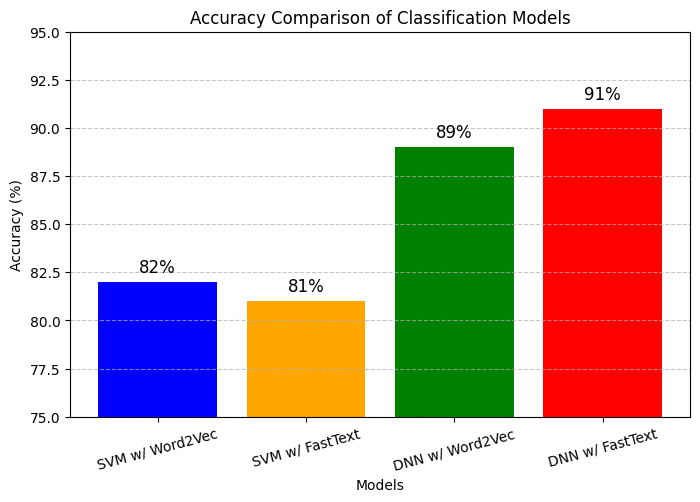

In [1]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy values
models = ["SVM w/ Word2Vec", "SVM w/ FastText", "DNN w/ Word2Vec", "DNN w/ FastText"]
accuracy = [82, 81, 89, 91]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=["blue", "orange", "green", "red"])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Classification Models")
plt.ylim(75, 95)  # Adjust y-axis limits for better visualization

# Show values on top of bars
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.5, f"{acc}%", ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
